<a href="https://colab.research.google.com/github/Aquib88raza/image-classification-ANKLE/blob/main/MLP86_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import random
import numpy as np
import cv2
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV, StratifiedKFold, cross_val_predict
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.metrics import confusion_matrix


In [ ]:
#Define the path to your image directories
normal_path = "/content/drive/MyDrive/Y2022Ankle (2)/healthy"
ill_path = "/content/drive/MyDrive/Y2022Ankle (2)/ill (1)"

# Create lists to store image data and labels
dataset_images = []
dataset_labels = []

# Reading - normal directory
for files in os.listdir(normal_path):
    if files.endswith(".jpg"):
        file_path = os.path.join(normal_path, files)
        image = cv2.imread(file_path)
        if image is not None and not image.size == 0:
            size = (256, 256)  # defined size for resizing of the images
            image = cv2.resize(image, size, interpolation=cv2.INTER_AREA)
            dataset_images.append(image.flatten())  # Flatten the image
            dataset_labels.append(0)  # Label for healthy images

# Reading - ill directory
for files in os.listdir(ill_path):
    if files.endswith(".jpg"):
        file_path = os.path.join(ill_path, files)
        image = cv2.imread(file_path)
        if image is not None and not image.size == 0:
            size = (256, 256)  # defined size for resizing of the images
            image = cv2.resize(image, size, interpolation=cv2.INTER_AREA)
            dataset_images.append(image.flatten())  # Flatten the image
            dataset_labels.append(1)  # Label for ill images

# Convert the lists to NumPy arrays
dataset_images = np.array(dataset_images)
dataset_labels = np.array(dataset_labels)
# Reshape images into 2-dimensional arrays
num_samples = len(dataset_images)
image_shape = dataset_images[0].shape
dataset_images_reshaped = np.reshape(dataset_images, (num_samples, -1))

# Normalize pixel values if needed (for MLPClassifier)
dataset_images_reshaped = dataset_images_reshaped / 255.0  # Normalize to the range [0, 1]
# Split the dataset into training and testing sets (e.g., 90% train, 5% test)
X_train, X_test, y_train, y_test = train_test_split(dataset_images, dataset_labels, test_size=0.05, random_state=42)

# Create and train the MLPClassifier
mlp_classifier = MLPClassifier(
    hidden_layer_sizes=(100, 100),  # Add an additional hidden layer
    activation='relu',
    solver='adam',
    max_iter=5000
)

mlp_classifier.fit(X_train, y_train)


print(len(dataset_images))

132


In [ ]:
y_pred = mlp_classifier.predict(X_test)

# Evaluate the model
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       1.00      0.67      0.80         3

    accuracy                           0.86         7
   macro avg       0.90      0.83      0.84         7
weighted avg       0.89      0.86      0.85         7



In [ ]:
# Make predictions on both train and test sets
y_train_pred = mlp_classifier.predict(X_train)
y_test_pred = mlp_classifier.predict(X_test)

# Evaluate the model on both train and test sets
train_report = classification_report(y_train, y_train_pred)
test_report = classification_report(y_test, y_test_pred)

print("Classification Report (Train):\n", train_report)
print("Classification Report (Test):\n", test_report)


Classification Report (Train):
               precision    recall  f1-score   support

           0       0.82      0.76      0.79        62
           1       0.78      0.84      0.81        63

    accuracy                           0.80       125
   macro avg       0.80      0.80      0.80       125
weighted avg       0.80      0.80      0.80       125

Classification Report (Test):
               precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       1.00      0.67      0.80         3

    accuracy                           0.86         7
   macro avg       0.90      0.83      0.84         7
weighted avg       0.89      0.86      0.85         7



In [ ]:
# Plot learning curves
def plot_learning_curve(estimator, title, X, y, cv=None, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Plot the learning curve for the MLPClassifier
title = "Learning Curves (MLPClassifier)"
cv = None  # You can specify a cross-validation strategy here if needed
plot_learning_curve(mlp_classifier, title, X_train, y_train, cv=cv)
plt.show()


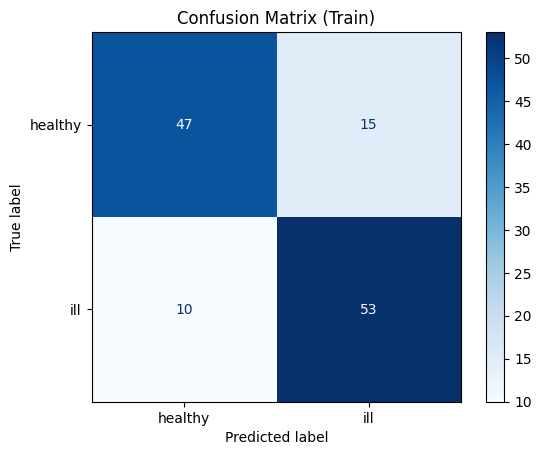

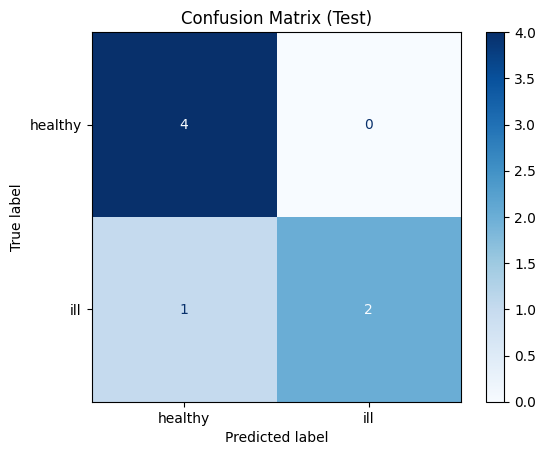

In [ ]:
train_confusion_matrix = confusion_matrix(y_train, y_train_pred)
test_confusion_matrix = confusion_matrix(y_test, y_test_pred)
# Create ConfusionMatrixDisplay for train set
disp_train = ConfusionMatrixDisplay(confusion_matrix=train_confusion_matrix, display_labels=["healthy", "ill"])
disp_train.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix (Train)")
plt.show()

# Create ConfusionMatrixDisplay for test set
disp_test = ConfusionMatrixDisplay(confusion_matrix=test_confusion_matrix, display_labels=["healthy", "ill"])
disp_test.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix (Test)")
plt.show()